In [ ]:
# !unzip "/content/drive/MyDrive/Dog-Vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog-Vision/"

# End to end Multiclass Dog Breed Classification

This notebook builds an end to end multiclass Dog Breed Classification using Tensorflow 2.0 and TensorFlow Hub.

## 1. Problem Definition:
Identifying the breed of the dog given the image of the dog.

## 2. Data:
The data we are using is from the kaggle dog breed classification competition.

## 3. Evaluation:
The evaluation is a file with prediction probabilities for each dog breed for each image.

## 4. Features:
Some information about the data:-
* We're dealing with unstructured data.
* There are 120 dog breeds.
* There are more than 10,000+ images in test and train dataset.


## Getting our workspace ready

In [ ]:
# importing tensorflow
import tensorflow as tf
import tensorflow_hub as hub
print(tf.__version__)
print(hub.__version__)
# chech for GPU 
print("GPU", "available (Yess!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

2.8.0
0.12.0
GPU available (Yess!!)


In [ ]:
# getting our data ready (converting them to tensors)

import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Dog-Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


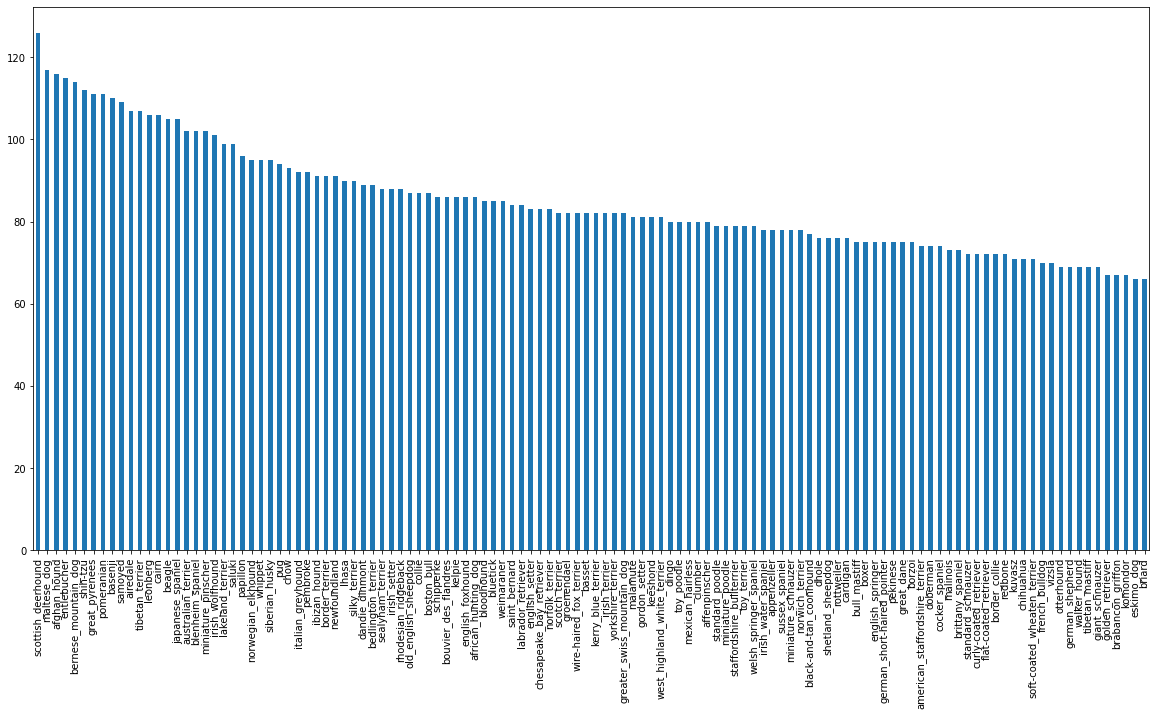

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize = (20, 10))

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

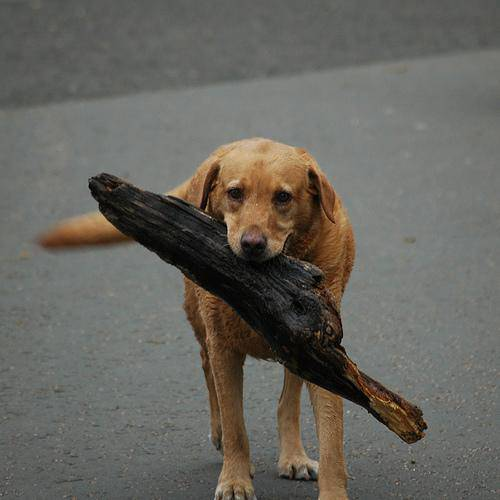

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/Dog-Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg")

## Getting images
lets get a list of all our image file pathnames

In [ ]:
filename = ["drive/MyDrive/Dog-Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

In [ ]:
filename[:10]

['drive/MyDrive/Dog-Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog-Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog-Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog-Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog-Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog-Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog-Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog-Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog-Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog-Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# checking if the number of filenames matches with the files
import os
if len(os.listdir("drive/MyDrive/Dog-Vision/train/")) == len(filename):
  print("Matched!!!")
else:
  print("Not matched")

Matched!!!


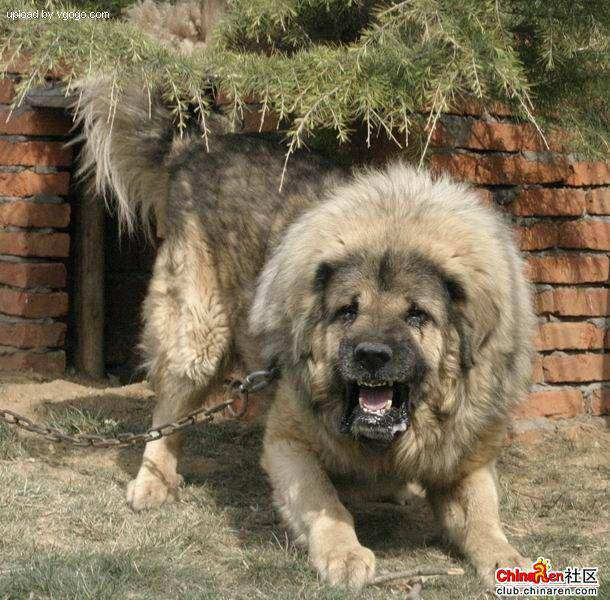

In [ ]:
Image(filename[9000])

### Now we have our path list ready, lets prepare our labels...

In [ ]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels[:20]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound', 'shetland_sheepdog', 'walker_hound',
       'maltese_dog', 'bluetick', 'norfolk_terrier',
       'african_hunting_dog', 'wire-haired_fox_terrier', 'redbone',
       'lakeland_terrier', 'boxer'], dtype=object)

In [ ]:
# checking if the number of breeds label is equal to filename or not

len(labels) == len(filename)

True

In [ ]:
# creating an array of all available breeds
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
# checking the no. of breeds available
len(unique_breeds)

120

In [ ]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# Example: Turing boolean array in integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where the label occurs
print(boolean_labels[0].argmax) # index where the label occurs at boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
<built-in method argmax of numpy.ndarray object at 0x7f8873c13390>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### creating our own validation set
as kaggle doesn't provide us with one so we make one on our own

In [ ]:
# setting up X & y
X = filename
y = boolean_labels

We are going to start off experimenting ~1000 images and increase as we need

In [ ]:
#Set number of images for usage in experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:100}

In [ ]:
from sklearn.model_selection import train_test_split

# spliting them into train and test set of total NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size = 0.2,
                                                  random_state = 42)


## Preprocessing Images(turing images into Tensors)

To preprocessing our images into tensors we will write function which will do few things:
1. Take an image filepath as input
2.  Use tensorflow to read the file and save it to a variable `image`.
3. Turn our `image` into a tensor.
4. Resize the `image` to be of the shape(226,226)
5. Return the modified `image`.

In [ ]:
# convert images to Numpy array
from matplotlib.pyplot import imread
image = imread(filename[42])
image.shape


(257, 350, 3)

In [ ]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [ ]:
# turning image into tensors
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

### Now we have seen an image as a tensor so now we can define a function

In [ ]:
# define image size
IMG_SIZE = 224

# Create a function for preprocessing
def process_image(image_path, img_size = IMG_SIZE):

  # read in an image file
  image = tf.io.read_file(image_path)
  #turning jpg image into numerical Tensor with 3 colour channels (red, green, blue)
  image = tf.image.decode_jpeg(image, channels = 3)
  #converting the colour channel values from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  #resize image to our desired value(224, 224)
  image = tf.image.resize(image, size = [img_size, img_size])

  #finally return the image...
  return image


## training data into batch size
why train data in batch size?

Let's say you're trying to process 10,000+ images in one go... they all may not fit in the memory.

So we do about 32 (this is the batch size) images at one time.

In [ ]:
# first we will create a function to return a tuple (image, label)
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

Now we are ready. Now we need to divide the data into batches for processing.

In [ ]:
# Define the batch size, 32 is good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):

  # if its a test_data we will not have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  # if its a valid dataset then we do not need to shuffle it 
  elif valid_data:
    print("Creating valid data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print("Creating training data batches...")
    # turn filepath and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    #shuffling data before mapping as it is easier to shuffle the filepath than the whole tensor
    data = data.shuffle(buffer_size = len(X))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

In [ ]:
# creating training and validation batch
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data = True)

Creating training data batches...
Creating valid data batches...


In [ ]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualisation of our data

Our data is now in batches, however these can be a little hard to understand/comprehend, so we will visualize it


In [ ]:
import matplotlib.pyplot as plt

# create a funciton to viewing images in a data batch 
def show_25_images(images,labels):
  # setup a figure
  plt.figure(figsize = (10,10))

  # loop through 25 to show 25 images
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)

    # Display an image
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])

    # turning grids line off
    plt.axis("off")

In [ ]:
np.argmax("pekinese")

0

In [ ]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
#train_images, train_labels = next(train_data.as_numpy_iterator())
#train_images, train_labels

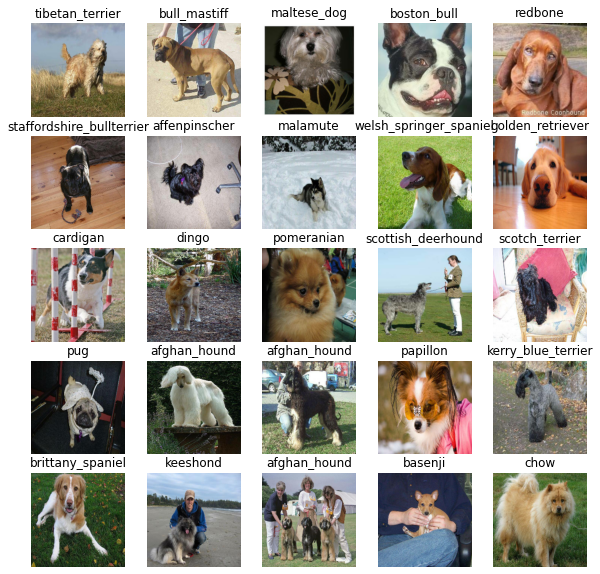

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

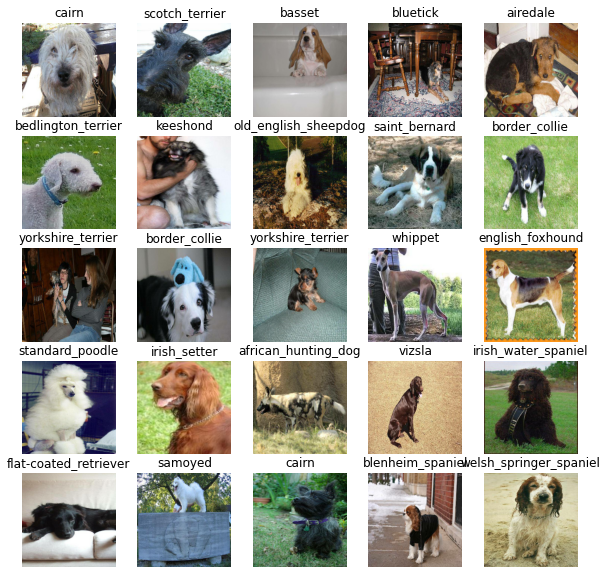

In [ ]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Before we build our model we need to define few things
1. The image shape (our image shape, in form of tensors) of our model.
2. The output shape (image labels in the form of tensors) of our model
3. The URL of our model we want to use.

In [ ]:
# Setup input shape of our models
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, weight, colours

# Setup putput shape of our labels
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorflowHUB
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

## Now we have got our input, model and the output ready. Let's put them together in keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape, outout shape, and the model we have choosen as parameter.
* Defines the layers in Keras model in squential order
* Compiles the model.
* Builds the model.
* Returns the model.

In [ ]:
# create a function that builds our keras model

def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print("Building model with", MODEL_URL)

  # seting up the model layers
  model = tf.keras.Sequential([
                               hub.KerasLayer(model_url),                      # Layer 1 input layer
                               tf.keras.layers.Dense(units = output_shape,     # Layer 2 output layer
                                                     activation = "softmax") 
  ])

  #Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

  # Build the model
  model.build(input_shape)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_2 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks
Callbacks are helpful function a model can use during training to do such things as saving progress, check its progressor stops training if the model stops improving.

W'll create 2 callbacks, one for TensorBoard which helps track the model's progress and another for early stoping which prevents our model from training for too long.

## TensorBoard Callback

To setup Tensorboard callback, we need three things:
1. Load the tensorboard notebook extention
2. Create a tensorboard callback which is able to save logs to the directory and pass it to our model's `fit()` function.
3. Visualize our models training logs with the `%tensorboard` magic function (we'll do this after model training )

In [ ]:
#load tensorboard notebook extention by using a magic function
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
import datetime

# create a function to build Tensorboard callback
def create_tensorboard_callback():
  # create a log directory for storiing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/Dog-Vision/logs",
                        # Make it so that logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


### Early stopping callbacks

Early stopping helps by making the model stop learning which prevents overfitting and thus helps the model to generalize better. It stops the model from training when a perticular evaluation metric stops improving.

In [ ]:
# Create early stoping callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                                   patience = 3)

## Training our model (on a data subset)

Our first model is going to train on 1000 images; to make sure everything works.

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider",min:10, max:100, step:10}

In [ ]:
# build a function to train the model and return to us the trained model
def train_model():
  '''
    Train the model and returns the trained model.
  '''
  # Create a model
  model = create_model()

  # Create new tensorboard session everytime we trains our model
  tensorboard = create_tensorboard_callback()

  # Fitting the model to the data passing it the callbacks we created
  model.fit(x = train_data,
            epochs = NUM_EPOCHS,
            validation_data = val_data,
            validation_freq = 1,
            callbacks = [tensorboard, early_stopping])
  
  # Return the fitted model
  return model


In [ ]:
# Fit the model to the data
model = train_model()

Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 17s 405ms/step - loss: 4.6879 - accuracy: 0.0875 - val_loss: 3.3629 - val_accuracy: 0.2400
Epoch 2/100
25/25 [==============================] - 5s 184ms/step - loss: 1.6726 - accuracy: 0.6762 - val_loss: 2.0900 - val_accuracy: 0.5500
Epoch 3/100
25/25 [==============================] - 4s 169ms/step - loss: 0.5698 - accuracy: 0.9438 - val_loss: 1.6486 - val_accuracy: 0.5750
Epoch 4/100
25/25 [==============================] - 4s 169ms/step - loss: 0.2571 - accuracy: 0.9825 - val_loss: 1.4501 - val_accuracy: 0.6300
Epoch 5/100
25/25 [==============================] - 4s 172ms/step - loss: 0.1537 - accuracy: 0.9962 - val_loss: 1.3813 - val_accuracy: 0.6300
Epoch 6/100
25/25 [==============================] - 4s 170ms/step - loss: 0.1036 - accuracy: 1.0000 - val_loss: 1.3468 - val_accuracy: 0.6300
Epoch 7/100
25/25 [==============================

### Checking the tensorboard logs


In [ ]:
%tensorboard --logdir drive/My\ Drive/Dog\-Vision/logs

Reusing TensorBoard on port 6006 (pid 4806), started 0:18:20 ago. (Use '!kill 4806' to kill it.)

<IPython.core.display.Javascript object>

## Making and evaluating predictions using train model

In [ ]:
# Make predictions on validation data (not used to train data)

predictions = model.predict(val_data, verbose = 1 )
predictions

7/7 [==============================] - 2s 139ms/step


array([[4.3699439e-03, 1.2703659e-04, 6.1072386e-04, ..., 1.2689545e-04,
        1.9015313e-05, 5.2073309e-03],
       [3.8243707e-03, 5.9984124e-04, 5.1333671e-03, ..., 2.4862597e-03,
        1.8828872e-03, 7.2936891e-05],
       [3.2951739e-05, 2.9474168e-04, 3.0202476e-05, ..., 2.3218263e-03,
        8.5667867e-05, 3.7866971e-03],
       ...,
       [3.7118607e-06, 3.2006146e-06, 1.7556255e-05, ..., 3.0115261e-06,
        3.4363118e-05, 1.2400629e-05],
       [4.6608360e-03, 8.3783947e-05, 4.9021375e-05, ..., 9.8256503e-05,
        3.8858325e-05, 9.6673230e-03],
       [1.8022320e-04, 3.0092937e-05, 2.7210908e-03, ..., 9.6978936e-03,
        1.8628391e-03, 1.3538485e-04]], dtype=float32)

In [ ]:
# first prediction
index = 75
print(f"Max value (probablity of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Prediction label: {unique_breeds[np.argmax(predictions[index])]}")

Max value (probablity of prediction): 0.9754227995872498
Sum: 0.9999998807907104
Max index: 3
Prediction label: airedale


Having the above funcitionality is great but we want to be able to do it at scale.
And it would be better if we could see the image on which prediction is being made.

In [ ]:
# turn predictions probablities into their respective labels (easier to understand)
def get_pred_labels(prediction_prbablities):
  """
     Turns an arrayof prediction probablities into a label
  """

  return unique_breeds[np.argmax(prediction_prbablities)]

# Get a predicted label based on a array of predicted probablities
pred_label = get_pred_labels(predictions[0])
print(pred_label)

cairn


In [ ]:
# create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label)Tensors and return seperate arrays of images and labels
  """
  images = []
  labels = []
  # loop through unbaatched data
  for image, label in data.unbatch().as_numpy_iterator():  #done some changes here
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)]) # some issue here come back again (kal aana kal!!!)
  return images, labels          # i fucked up the indentation

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_labels


['cairn',
 'scotch_terrier',
 'basset',
 'bluetick',
 'airedale',
 'bedlington_terrier',
 'keeshond',
 'old_english_sheepdog',
 'saint_bernard',
 'border_collie',
 'yorkshire_terrier',
 'border_collie',
 'yorkshire_terrier',
 'whippet',
 'english_foxhound',
 'standard_poodle',
 'irish_setter',
 'african_hunting_dog',
 'vizsla',
 'irish_water_spaniel',
 'flat-coated_retriever',
 'samoyed',
 'cairn',
 'blenheim_spaniel',
 'welsh_springer_spaniel',
 'scottish_deerhound',
 'komondor',
 'norwich_terrier',
 'cardigan',
 'dingo',
 'dandie_dinmont',
 'walker_hound',
 'walker_hound',
 'mexican_hairless',
 'eskimo_dog',
 'siberian_husky',
 'welsh_springer_spaniel',
 'doberman',
 'mexican_hairless',
 'kuvasz',
 'labrador_retriever',
 'wire-haired_fox_terrier',
 'english_foxhound',
 'collie',
 'toy_poodle',
 'groenendael',
 'boston_bull',
 'standard_poodle',
 'miniature_poodle',
 'chihuahua',
 'staffordshire_bullterrier',
 'vizsla',
 'norfolk_terrier',
 'pug',
 'bedlington_terrier',
 'affenpinsche

In [ ]:
#get_pred_labels(val_labels[3])

Now we have got ways to get:
* Prediction labels
* Validation labels(truth labels)
* Validation images

Lets make some functions to make these all a bit more visualize.

We'll create a function which:
* Takes an array of prediction probablitites, an array of trute labels and an array of images and integers.
* Convert the prediction probablities to predicted labels.
* Plot the predicted label, truth label and the target image on a single plot.

In [ ]:
def plot_pred(prediction_probablities, labels, images, n=0):
  """
  View the prediction, ground truth, and the image for n samples.
  """
  pred_prob, true_label, image = prediction_probablities[n], labels[n], images[n]

  # get pred labels
  pred_label = get_pred_labels(pred_prob)

  #Plot image & remove ticks
  plt.imshow(image) 
  plt.xticks([])
  plt.yticks([])

  # changing the colour of the title depending if the prediction is write or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"  

  # CHange plot title
  plt.title("Predicted:{}  Confidence%:{:2.0f}%  Actual:{}".format(pred_label,
                                   np.max(pred_prob)*100,
                                   true_label),
                                   color = color)

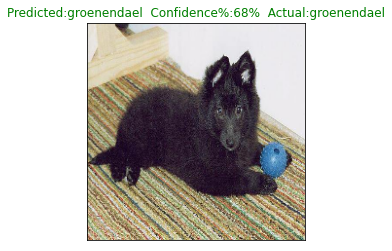

In [ ]:
plot_pred(predictions,
          labels = val_labels,
          images = val_images,
          n = 77)

Now we've got a function to visualize our models top prediction, let's make another to view our model's top 10 predictions.
This function will:
* take an input of prediction probablites array and a ground truth and an indentation
* Find the prediction using `get_pred_label()`
